In [2]:
% pylab inline
from __future__ import print_function
from pprint import pprint

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import pandas as pd

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

import time

rcParams['figure.figsize'] = 12, 4

__target__ = 'adopter'
__id__ = 'user_id'
train = pd.read_csv("data/train.csv")
score = pd.read_csv("data/score.csv")
score.head(1)

Populating the interactive namespace from numpy and matplotlib


,row_number,user_id,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
0,1,5,29,1,36,23.785714,0.764706,9,0,9246,...,1,0,152,0,0,0,0,81,1,0.0


In [3]:
score.describe()

,row_number,user_id,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,86681.000000,8.668100e+04,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,...,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86680.000000
mean,43341.000000,8.568399e+05,24.012621,0.625108,19.330049,24.059611,0.617691,4.073292,0.440939,18057.370012,...,0.108617,-0.020350,932.254704,4.471534,0.133143,0.002457,1.171052,44.202293,0.353676,0.000265
std,25022.793679,4.941988e+05,6.393003,0.484098,73.992293,5.104065,0.318366,5.913118,1.966933,29152.584389,...,0.927222,0.568315,2763.441203,37.940155,7.466784,0.172407,22.990162,19.730629,0.478113,0.034804
min,1.000000,5.000000e+00,8.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,-30.000000,-14.000000,-104540.000000,-2230.000000,-9.000000,-8.000000,-423.000000,0.000000,0.000000,-1.000000
25%,21671.000000,4.279080e+05,20.000000,0.000000,3.000000,20.750000,0.428571,1.000000,0.000000,1306.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,43341.000000,8.561090e+05,23.000000,1.000000,7.000000,23.000000,0.666667,2.000000,0.000000,7640.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000
75%,65011.000000,1.287271e+06,26.000000,1.000000,19.000000,26.153846,0.900000,4.000000,0.000000,23327.000000,...,0.000000,0.000000,897.000000,0.000000,0.000000,0.000000,0.000000,59.000000,1.000000,0.000000
max,86681.000000,1.708981e+06,79.000000,1.000000,10868.000000,79.000000,1.000000,138.000000,181.000000,899816.000000,...,56.000000,41.000000,112577.000000,4728.000000,1496.000000,33.000000,3272.000000,112.000000,1.000000,1.000000


In [3]:
train.head(1)

,row_number,user_id,adopter,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
0,1,10,0,24,0,20,26.333333,0.777778,6,0,...,0,0,54,0,0,0,0,79,0,0


In [4]:
train.describe()

,row_number,user_id,adopter,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,86682.000000,8.668200e+04,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,...,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000
mean,43341.500000,8.547774e+05,0.017766,23.993067,0.622217,18.988521,24.068308,0.617246,4.040147,0.434935,...,0.105847,-0.021054,942.677188,4.716723,0.279158,0.002757,0.954500,44.350061,0.352045,0.000242
std,25023.082354,4.938304e+05,0.132101,6.388225,0.484836,57.934430,5.127068,0.318587,5.843532,1.853233,...,0.843507,0.534960,2856.036359,155.648950,43.782235,0.177153,19.209259,19.707058,0.477611,0.034803
min,1.000000,1.000000e+01,0.000000,8.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,...,-29.000000,-18.000000,-135022.000000,-951.000000,-264.000000,-5.000000,-2752.000000,0.000000,0.000000,-1.000000
25%,21671.250000,4.279675e+05,0.000000,20.000000,0.000000,3.000000,20.750000,0.428571,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,43341.500000,8.520060e+05,0.000000,23.000000,1.000000,7.000000,23.000000,0.666667,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000
75%,65011.750000,1.282592e+06,0.000000,26.000000,1.000000,18.000000,26.157895,0.900000,4.000000,0.000000,...,0.000000,0.000000,913.000000,0.000000,0.000000,0.000000,0.000000,59.000000,1.000000,0.000000
max,86682.000000,1.708942e+06,1.000000,79.000000,1.000000,6437.000000,77.000000,1.000000,122.000000,225.000000,...,41.000000,19.000000,217876.000000,44900.000000,12702.000000,20.000000,2036.000000,112.000000,1.000000,1.000000


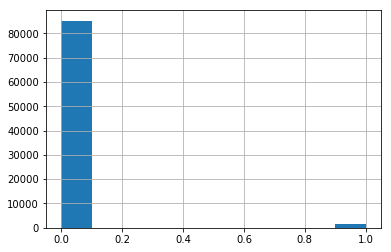

In [7]:
train.adopter.hist()

In [5]:
def modelfit(alg, dtrain, score, predictors, target, cv_folds, early_stopping_rounds):
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
    cvresult = xgb.cv(
        xgb_param,
        xgtrain,
        num_boost_round=alg.get_params()['n_estimators'], 
        nfold=cv_folds,
        metrics='auc',
        early_stopping_rounds=early_stopping_rounds
    )
    alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric=f1_score)
        
    #Predict training set:
    score_predictions = alg.predict(score[predictors])
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    _fscore_ = f1_score(dtrain[target].values, dtrain_predictions)
    print("F1: {0}".format(_fscore_))
    pprint(confusion_matrix(dtrain[target].values, dtrain_predictions))
    return score_predictions, alg

predictors = [x for x in train.columns if x not in [__target__, __id__, 'row_number']]
xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=14,
 seed=27
)
score_predictions,alg = modelfit(xgb1, train, score, predictors, __target__, cv_folds=5, early_stopping_rounds=100)



Model Report
F1: 0.18828451882845187
array([[82352,  2790],
       [ 1090,   450]])


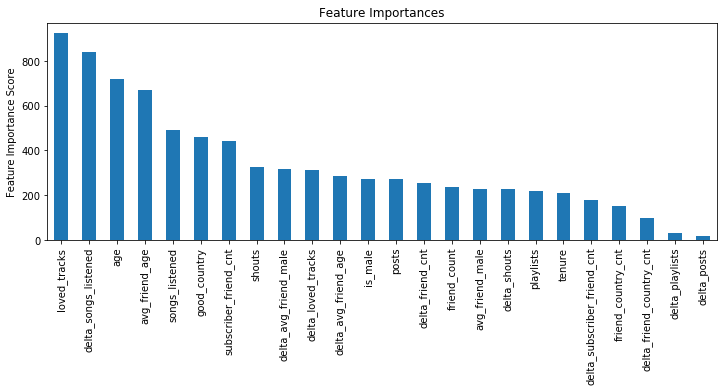

In [6]:
feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [7]:
timestr = time.strftime("%Y%m%d-%H%M%S") 
file_name = "output/{0}-{1}.csv".format("xgboost",timestr)
user_id = score.values[:,1]
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in score_predictions:
       csvfile.write("%s,%d\n" % (user_id[i],prediction))
       i += 1
print('Success')

Success
